## Langchain for LLM Application Development 

### 1. Introduction 

We know by using prompts we can develop AI Applications much faster . But if we have to write multiple prompts and parse the output multiple times. We will have to write Glue code 'n' no of times 

LANGCHAIN makes this development process much more easier .

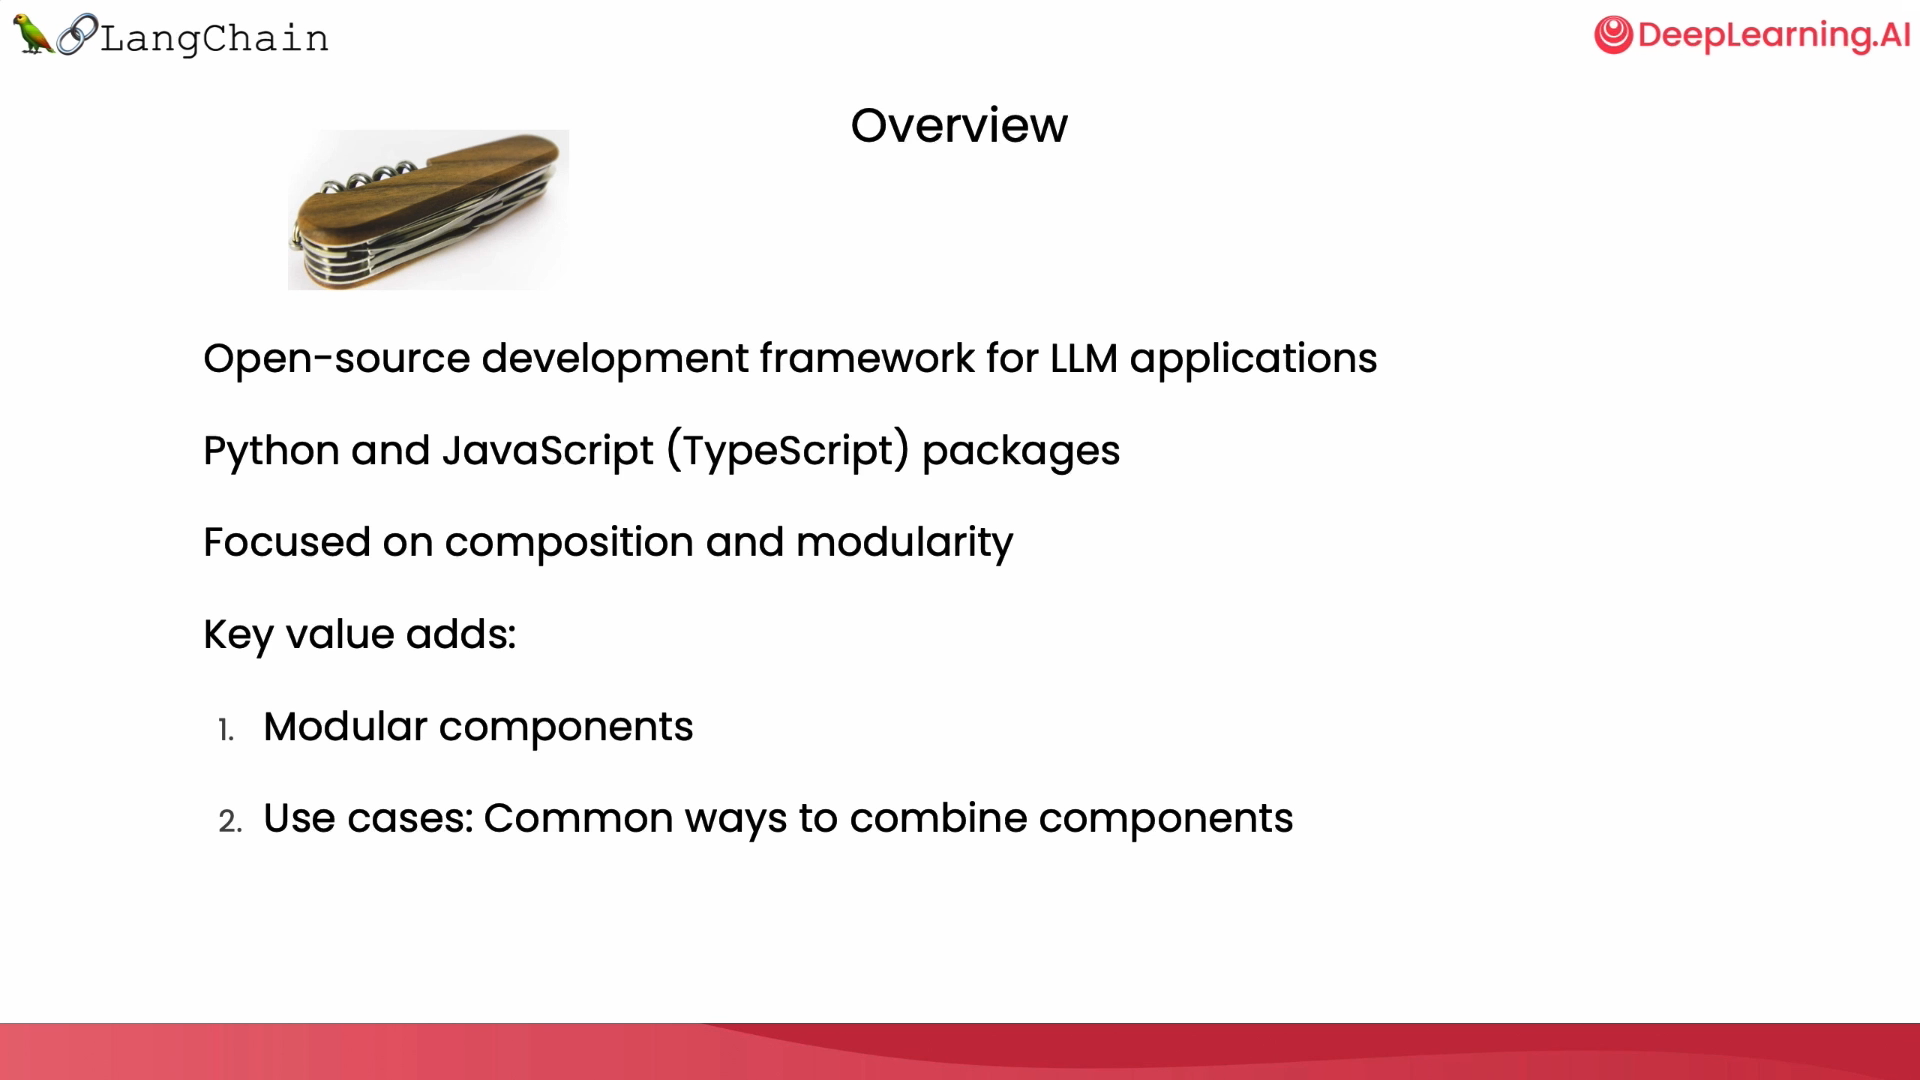

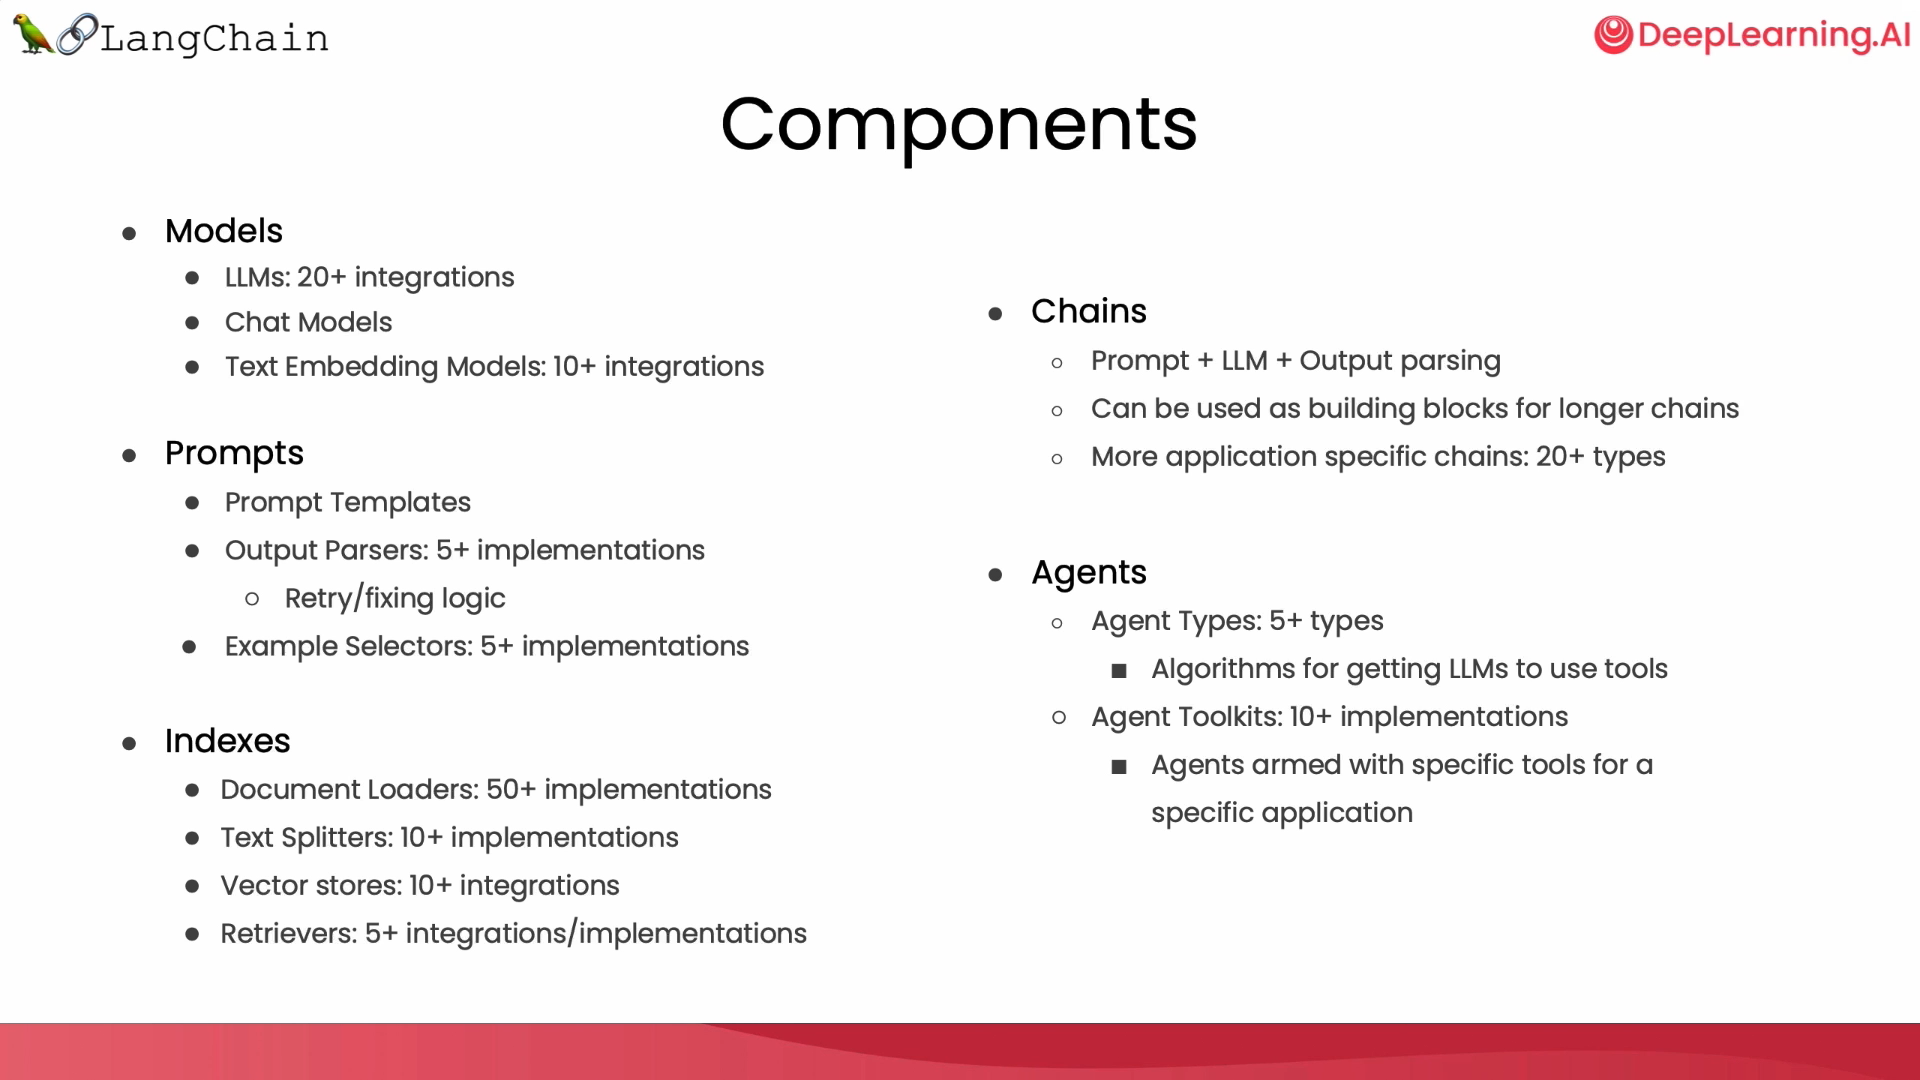

### 2. Langchain - Models , Prompts and Parsers 

Models - Language Models
Prompts - Style of creating inputs to parse into the model 
Parsers - Parsing Model output into more structured format 


## Outline

 * Direct API calls to OpenAI
 * API calls through LangChain:
   * Prompts
   * Models
   * Output parsers

In [1]:
import os
import openai

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
openai.api_key = os.environ['OPENAI_API_KEY']

In [2]:
# account for deprecation of LLM model
import datetime
# Get the current date
current_date = datetime.datetime.now().date()

# Define the date after which the model should be set to "gpt-3.5-turbo"
target_date = datetime.date(2024, 6, 12)

# Set the model variable based on the current date
if current_date > target_date:
    llm_model = "gpt-3.5-turbo"
else:
    llm_model = "gpt-3.5-turbo-0301"

In [3]:
def get_completion(prompt, model=llm_model):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, 
    )
    return response.choices[0].message["content"]


In [4]:
get_completion("What is 1+1?")

'As an AI language model, I can tell you that the answer to 1+1 is 2.'

Lets say you get an email from customer other than English.

In [5]:
customer_email = """
Arrr, I be fuming that me blender lid \
flew off and splattered me kitchen walls \
with smoothie! And to make matters worse,\
the warranty don't cover the cost of \
cleaning up me kitchen. I need yer help \
right now, matey!
"""

Now we will tell LLM to translate the above sentence into American English

In [6]:
style = """American English \
in a calm and respectful tone
"""

prompt = f"""Translate the text \
that is delimited by triple backticks 
into a style that is {style}.
text: ```{customer_email}```
"""

print(prompt)

Translate the text that is delimited by triple backticks 
into a style that is American English in a calm and respectful tone
.
text: ```
Arrr, I be fuming that me blender lid flew off and splattered me kitchen walls with smoothie! And to make matters worse,the warranty don't cover the cost of cleaning up me kitchen. I need yer help right now, matey!
```



In [7]:
response = get_completion(prompt)

In [8]:
response

'I am quite upset that my blender lid came off and caused my smoothie to splatter all over my kitchen walls. Additionally, the warranty does not cover the cost of cleaning up the mess. Would you be able to assist me at this time, my friend? Thank you kindly.'

Lets say you have customers writting you the mail in different languages (French,German,Hindi,Chinese and so on).It will be difficult to write different different prompts for each of this language. 

Lets see how we can do it in more convenient Way using Langchain 

So basically . Customer will write a mail in any language (English Pirate) . Now our job is to convert it into American English using LLM . Pass this into LLM . Output that we get will be in form of American English . Now we will convert this American English into English Pirate using LLM Template that we create earlier 


#### Chat API : LangChain

In [ ]:
## Model 
from langchain.chat_models import ChatOpenAI
# To control the randomness and creativity of the generated
# text by an LLM, use temperature = 0.0
chat = ChatOpenAI(temperature=0.0, model=llm_model)
chat

In [10]:
## Prompt Template : To repeatedly use below template . We will use ChatPromptTemplate
template_string = """Translate the text \
that is delimited by triple backticks \
into a style that is {style}. \
text: ```{text}```
"""
from langchain.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_template(template_string)
prompt_template

ChatPromptTemplate(input_variables=['style', 'text'], output_parser=None, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['style', 'text'], output_parser=None, partial_variables={}, template='Translate the text that is delimited by triple backticks into a style that is {style}. text: ```{text}```\n', template_format='f-string', validate_template=True), additional_kwargs={})])

In [11]:
prompt_template.messages[0].prompt

PromptTemplate(input_variables=['style', 'text'], output_parser=None, partial_variables={}, template='Translate the text that is delimited by triple backticks into a style that is {style}. text: ```{text}```\n', template_format='f-string', validate_template=True)

In [12]:
prompt_template.messages[0].prompt.input_variables

['style', 'text']

In [13]:
customer_style = """American English \
in a calm and respectful tone
"""
customer_email = """
Arrr, I be fuming that me blender lid \
flew off and splattered me kitchen walls \
with smoothie! And to make matters worse, \
the warranty don't cover the cost of \
cleaning up me kitchen. I need yer help \
right now, matey!
"""

Now we will use the prompt template that we created above . And will add above style and email in prompt template created 

In [15]:
customer_messages = prompt_template.format_messages(
                    style=customer_style,
                    text=customer_email)
customer_messages

[HumanMessage(content="Translate the text that is delimited by triple backticks into a style that is American English in a calm and respectful tone\n. text: ```\nArrr, I be fuming that me blender lid flew off and splattered me kitchen walls with smoothie! And to make matters worse, the warranty don't cover the cost of cleaning up me kitchen. I need yer help right now, matey!\n```\n", additional_kwargs={}, example=False)]

In [16]:
print(type(customer_messages))
print(type(customer_messages[0]))

<class 'list'>
<class 'langchain.schema.messages.HumanMessage'>


In [17]:
print(customer_messages[0])

content="Translate the text that is delimited by triple backticks into a style that is American English in a calm and respectful tone\n. text: ```\nArrr, I be fuming that me blender lid flew off and splattered me kitchen walls with smoothie! And to make matters worse, the warranty don't cover the cost of cleaning up me kitchen. I need yer help right now, matey!\n```\n" additional_kwargs={} example=False


Now we will call the LLM to translate the message using above template i-e customer_messages with Prompt and inputs 

In [18]:
# Call the LLM to translate to the style of the customer message
customer_response = chat(customer_messages)

In [19]:
print(customer_response.content)

I'm really frustrated that my blender lid flew off and made a mess of my kitchen walls with smoothie. To add to my frustration, the warranty doesn't cover the cost of cleaning up my kitchen. Can you please help me out, friend?


Till now we have converted the mail into style using LLM . Now we will reply to that customer using Langchain itself and Prompt Template that we have created earlier .

But now we will be converting our American english into the Language of customer while the customer wrote a mail

In [20]:
service_reply = """Hey there customer, \
the warranty does not cover \
cleaning expenses for your kitchen \
because it's your fault that \
you misused your blender \
by forgetting to put the lid on before \
starting the blender. \
Tough luck! See ya!
"""
service_style_pirate = """\
a polite tone \
that speaks in English Pirate\
"""
service_messages = prompt_template.format_messages(
    style=service_style_pirate,
    text=service_reply)

print(service_messages[0].content)

Translate the text that is delimited by triple backticks into a style that is a polite tone that speaks in English Pirate. text: ```Hey there customer, the warranty does not cover cleaning expenses for your kitchen because it's your fault that you misused your blender by forgetting to put the lid on before starting the blender. Tough luck! See ya!
```



In [21]:
service_response = chat(service_messages)
print(service_response.content)

Ahoy there, me hearty customer! I be sorry to inform ye that the warranty be not coverin' the expenses o' cleaning yer galley, as 'tis yer own fault fer misusin' yer blender by forgettin' to put the lid on afore startin' it. Aye, tough luck! Farewell and may the winds be in yer favor!


Why are we using prompt Templates 

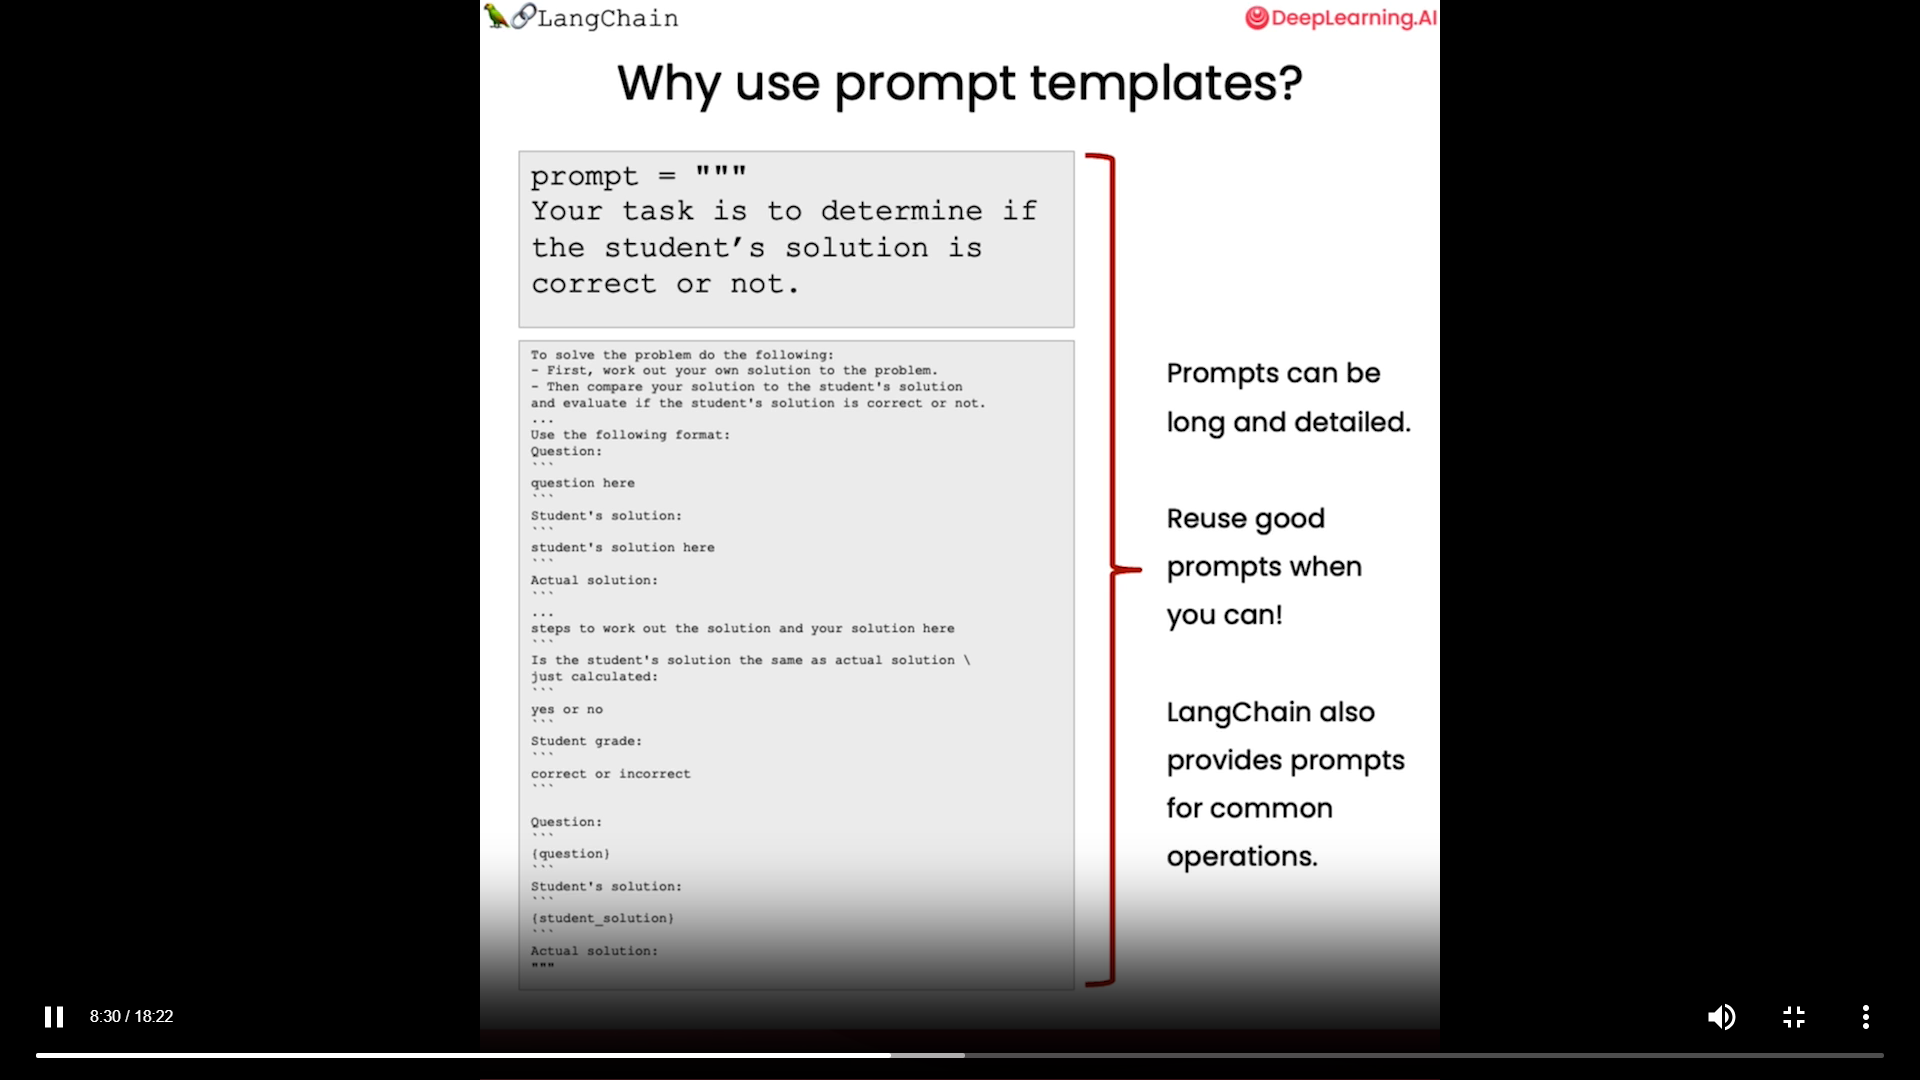

Langchain helps you to connect different model , Api , Databases

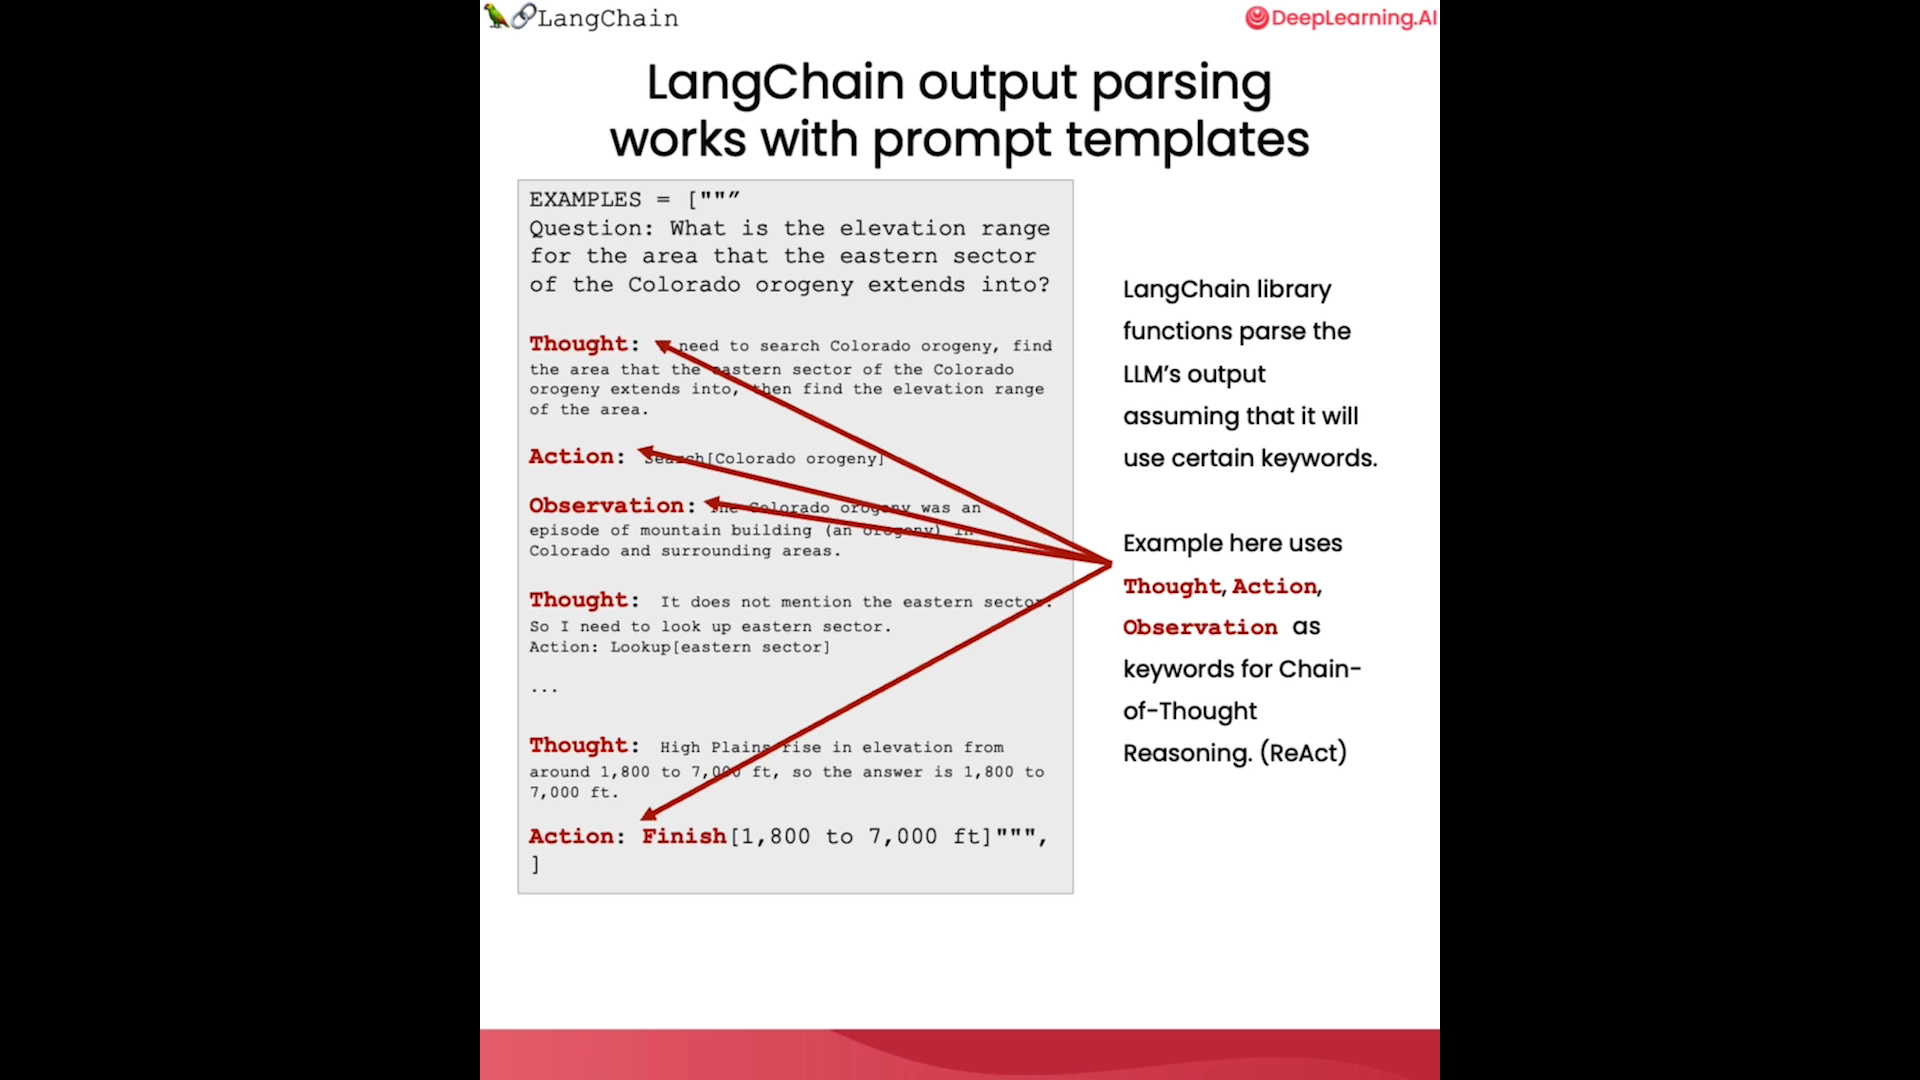

Langhcain helps you to parse output using keywords used above [Thought,Action,Observation]

####  Output Parsers 

In [22]:
{
  "gift": False,
  "delivery_days": 5,
  "price_value": "pretty affordable!"
}

customer_review = """\
This leaf blower is pretty amazing.  It has four settings:\
candle blower, gentle breeze, windy city, and tornado. \
It arrived in two days, just in time for my wife's \
anniversary present. \
I think my wife liked it so much she was speechless. \
So far I've been the only one using it, and I've been \
using it every other morning to clear the leaves on our lawn. \
It's slightly more expensive than the other leaf blowers \
out there, but I think it's worth it for the extra features.
"""

review_template = """\
For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? \
Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the product \
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,\
and output them as a comma separated Python list.

Format the output as JSON with the following keys:
gift
delivery_days
price_value

text: {text}
"""

In [23]:
from langchain.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_template(review_template)
print(prompt_template)

input_variables=['text'] output_parser=None partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['text'], output_parser=None, partial_variables={}, template='For the following text, extract the following information:\n\ngift: Was the item purchased as a gift for someone else? Answer True if yes, False if not or unknown.\n\ndelivery_days: How many days did it take for the product to arrive? If this information is not found, output -1.\n\nprice_value: Extract any sentences about the value or price,and output them as a comma separated Python list.\n\nFormat the output as JSON with the following keys:\ngift\ndelivery_days\nprice_value\n\ntext: {text}\n', template_format='f-string', validate_template=True), additional_kwargs={})]


In [24]:
messages = prompt_template.format_messages(text=customer_review)
chat = ChatOpenAI(temperature=0.0, model=llm_model)
response = chat(messages)
print(response.content)

{
    "gift": true,
    "delivery_days": 2,
    "price_value": ["It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features."]
}


In [25]:
type(response.content)

str

In [26]:
# You will get an error by running this line of code 
# because'gift' is not a dictionary
# 'gift' is a string
response.content.get('gift')

AttributeError: 'str' object has no attribute 'get'

We will have to parse the output using OutputParser Provided by Langchain

#### Parse the LLM output string into a Python dictionary

In [27]:
from langchain.output_parsers import ResponseSchema
from langchain.output_parsers import StructuredOutputParser

gift_schema = ResponseSchema(name="gift",
                             description="Was the item purchased\
                             as a gift for someone else? \
                             Answer True if yes,\
                             False if not or unknown.")
delivery_days_schema = ResponseSchema(name="delivery_days",
                                      description="How many days\
                                      did it take for the product\
                                      to arrive? If this \
                                      information is not found,\
                                      output -1.")
price_value_schema = ResponseSchema(name="price_value",
                                    description="Extract any\
                                    sentences about the value or \
                                    price, and output them as a \
                                    comma separated Python list.")

response_schemas = [gift_schema, 
                    delivery_days_schema,
                    price_value_schema]

In [28]:
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)
format_instructions = output_parser.get_format_instructions()
print(format_instructions)

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":

```json
{
	"gift": string  // Was the item purchased                             as a gift for someone else?                              Answer True if yes,                             False if not or unknown.
	"delivery_days": string  // How many days                                      did it take for the product                                      to arrive? If this                                       information is not found,                                      output -1.
	"price_value": string  // Extract any                                    sentences about the value or                                     price, and output them as a                                     comma separated Python list.
}
```


So while calling LLM this time . We will also Tell LLM to use Output Paarser Formatted Instructions . So that we get output in dict

In [29]:
review_template_2 = """\
For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? \
Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the product\
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,\
and output them as a comma separated Python list.

text: {text}

{format_instructions}
"""

prompt = ChatPromptTemplate.from_template(template=review_template_2)

messages = prompt.format_messages(text=customer_review, 
                                format_instructions=format_instructions)

In [30]:
print(messages[0].content)

For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the productto arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,and output them as a comma separated Python list.

text: This leaf blower is pretty amazing.  It has four settings:candle blower, gentle breeze, windy city, and tornado. It arrived in two days, just in time for my wife's anniversary present. I think my wife liked it so much she was speechless. So far I've been the only one using it, and I've been using it every other morning to clear the leaves on our lawn. It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features.


The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```

In [31]:
response = chat(messages)
print(response.content)

```json
{
	"gift": true,
	"delivery_days": "2",
	"price_value": ["It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features."]
}
```


In [32]:
response.content.get('gift')

AttributeError: 'str' object has no attribute 'get'

In [33]:
## We will have to use output parser for schema which we created
output_dict = output_parser.parse(response.content)
output_dict

{'gift': True,
 'delivery_days': '2',
 'price_value': ["It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features."]}

In [34]:
type(output_dict)

dict

In [35]:
output_dict.get('delivery_days')

'2'

In [37]:
output_dict.get('gift')

True